In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

In [0]:
schema=StructType([StructField('Date',DateType(),True),
                  StructField('Location',StringType(),True),
                  StructField('MinTemp',FloatType(),True),
                  StructField('MaxTemp',FloatType(),True),
                  StructField('Rainfall',FloatType(),True),
                  StructField('Evaporation',StringType(),True),
                  StructField('Sunshine',StringType(),True),
                  StructField('WindGustDir',StringType(),True),
                  StructField('WindGustSpeed',FloatType(),True),
                  StructField('WindDir9am',StringType(),True),
                  StructField('WindDir3pm',StringType(),True),
                  StructField('WindSpeed9am',FloatType(),True),
                  StructField('WindSpeed3pm',FloatType(),True),
                  StructField('Humidity9am',FloatType(),True),
                  StructField('Humidity3pm',FloatType(),True),
                  StructField('Pressure9am',FloatType(),True),
                  StructField('Pressure3pm',FloatType(),True),
                  StructField('Cloud9am',FloatType(),True),
                  StructField('Cloud3pm',FloatType(),True),
                  StructField('Temp9am',FloatType(),True),
                  StructField('Temp3pm',FloatType(),True),
                  StructField('RainToday',StringType(),True),
                  StructField('RainTomorrow',StringType(),True)])

In [0]:
df=spark.read.csv(path='/FileStore/tables/weatherAUS.csv',schema=schema,inferSchema=False)

In [0]:
df=df.dropna(subset='Date')

In [0]:
df.printSchema()

root
-- Date: date (nullable = true)
-- Location: string (nullable = true)
-- MinTemp: float (nullable = true)
-- MaxTemp: float (nullable = true)
-- Rainfall: float (nullable = true)
-- Evaporation: string (nullable = true)
-- Sunshine: string (nullable = true)
-- WindGustDir: string (nullable = true)
-- WindGustSpeed: float (nullable = true)
-- WindDir9am: string (nullable = true)
-- WindDir3pm: string (nullable = true)
-- WindSpeed9am: float (nullable = true)
-- WindSpeed3pm: float (nullable = true)
-- Humidity9am: float (nullable = true)
-- Humidity3pm: float (nullable = true)
-- Pressure9am: float (nullable = true)
-- Pressure3pm: float (nullable = true)
-- Cloud9am: float (nullable = true)
-- Cloud3pm: float (nullable = true)
-- Temp9am: float (nullable = true)
-- Temp3pm: float (nullable = true)
-- RainToday: string (nullable = true)
-- RainTomorrow: string (nullable = true)

In [0]:
df.select('Location').distinct().count()

Out[6]: 49

In [0]:
df.show(5)

+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
 Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
2008-12-01| Albury| 13.4| 22.9| 0.6| NA| NA| W| 44.0| W| WNW| 20.0| 24.0| 71.0| 22.0| 1007.7| 1007.1| 8.0| null| 16.9| 21.8| No| No|
2008-12-02| Albury| 7.4| 25.1| 0.0| NA| NA| WNW| 44.0| NNW| WSW| 4.0| 22.0| 44.0| 25.0| 1010.6| 1007.8| null| null| 17.2| 24.3| No| No|
2008-12-03| Albury| 12.9| 25.7| 0.0| NA| NA| WSW| 46.0| W| WSW| 19.0| 26.0| 38.0| 30.0| 1007.6| 1008.7| null| 2.0| 21.0| 23.2| No| No|
2008-12-04| Albury| 9.2| 28.0| 0.0| NA| NA| NE| 24.0| SE| E| 11.0| 9.0| 45.0| 16.0| 1017.6| 1012.8| null| null| 18.1| 26.5| No| No|
2008-12-05| Albury| 17.5| 32.3| 1.0| NA| NA| W| 41.0| ENE| NW| 7.0| 20.0| 82.0| 33.0| 1010.8| 1006.0| 7.0| 8.0| 17.8| 29.7| No| No|
+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
only showing top 5 rows

In [0]:
#What is the avg temperature per year?
display(df.filter(year('Date').isNotNull()).groupBy(year('Date')).agg(avg('MinTemp').alias('Min'),avg('MaxTemp').alias('Max')).orderBy(year('Date')))

year(Date),Min,Max
2007,12.545901689373078,25.086885170858416
2008,12.450996026733165,22.874358982664624
2009,12.160258116771873,23.25101918328938
2010,12.093076410814854,22.5712465359428
2011,12.022364220504283,22.540179680924492
2012,11.225459276534835,22.31142428783607
2013,11.89695319687146,23.290936312855543
2014,12.405206286237327,23.79273880964522
2015,12.235737592317118,23.515651821266808
2016,12.565211499243354,23.419984170985266


In [0]:
#get the maximum temperature and min tempurature by date,location,rainfall
display(df.groupBy('location','Date').agg(max('MaxTemp'),min('MinTemp'),min('Rainfall')))


location,Date,max(MaxTemp),min(MinTemp),min(Rainfall)
Albury,2009-05-11,17.7,4.3,0.0
Albury,2009-11-15,36.3,17.2,0.0
Albury,2010-02-26,null,17.2,0.0
Albury,2010-05-11,15.6,3.0,0.0
Albury,2010-11-09,27.7,11.6,0.0
Albury,2011-01-07,30.7,16.1,0.0
Albury,2011-03-17,25.9,12.1,0.2
Albury,2011-12-30,30.4,15.0,0.0
Albury,2012-02-08,28.9,12.0,0.0
Albury,2013-11-15,25.1,5.1,0.0


In [0]:
df.createOrReplaceTempView('australia')

In [0]:
%sql select * from (Select location,Date,MaxTemp,MinTemp,Rainfall,Dense_Rank() Over(Partition BY location ORDER BY MaxTemp DESC) as RANK from australia where MaxTemp IS NOT NULL) where RANK =1 order by MaxTemp desc
--Below are the Places,Dates which recorded the highest Temp

location,Date,MaxTemp,MinTemp,Rainfall,RANK
Woomera,2011-01-25,48.1,25.1,0.0,1
Moree,2014-01-03,47.3,28.3,0.0,1
Moree,2017-02-12,47.3,27.8,0.0,1
Richmond,2017-02-11,47.0,22.3,0.0,1
Penrith,2017-02-11,46.9,23.3,0.0,1
MelbourneAirport,2009-02-07,46.8,18.8,0.0,1
Mildura,2009-02-07,46.7,26.1,0.0,1
Watsonia,2009-02-07,46.7,18.0,0.0,1
Cobar,2017-02-11,46.6,29.4,0.0,1
BadgerysCreek,2017-02-11,46.4,21.5,0.0,1


In [0]:
#def monthname(value):
#  value=str(value)
#  datetime_object=datetime.datetime.strptime(value,"%m")
#  month_name=datetime_object.strftime("%b")
#  return month_name

In [0]:
#Let's look for seasonality. May be a line graph which show the change in temperature 
#Calculate the average monthly temperatures over the past years in each location
display(df.filter(df['location']!='Location').groupby('location',month('Date').alias('MonthID')).agg(avg('MaxTemp').alias('AverageMaxTemp')).orderBy(month('Date'),ascending=False))

location,MonthID,AverageMaxTemp
Perth,12,29.445161311857163
Albany,12,21.05147681256387
Bendigo,12,28.066129034565343
GoldCoast,12,28.327530308773643
MountGambier,12,24.1008096918886
SydneyAirport,12,26.600460861135737
Sale,12,24.469585234119045
Walpole,12,22.491244232599637
Williamtown,12,27.67603679076867
Witchcliffe,12,24.976958455028623


In [0]:
display(df.filter(df['location']!='Location').groupby('location',month('Date').alias('MonthID')).agg(avg('MinTemp').alias('AverageMinTemp')).orderBy(month('Date'),ascending=False))

location,MonthID,AverageMinTemp
Perth,12,16.419758031445166
Albany,12,14.95958334604899
Bendigo,12,12.560080636893549
GoldCoast,12,20.554251033767514
MountGambier,12,10.500806474877942
SydneyAirport,12,18.68433182799871
Sale,12,12.034101393914991
Walpole,12,12.881018488495439
Williamtown,12,16.91059908449375
Witchcliffe,12,12.422580659664172


In [0]:
df.filter((df['location']!='Location') & ((month('Date')==7)|(month('Date')==6))).groupby('location',month('Date').alias('MonthID')).agg(avg('MaxTemp').alias('AverageMaxTemp'),avg('MinTemp').alias('AverageMinTemp')).orderBy(month('Date'),ascending=False).display(50)

location,MonthID,AverageMaxTemp,AverageMinTemp
NorfolkIsland,7,18.56411293245131,13.951209648962944
NorahHead,7,17.497983851740436,9.916129048793547
Albury,7,13.326209718181241,3.654435481515623
Sydney,7,17.991397830320516,8.986738350229023
Penrith,7,17.85975610919115,5.577642280305547
Williamtown,7,17.80282255911058,6.964112906145953
Wollongong,7,17.105645129757544,10.265725802990698
Richmond,7,17.838306469302022,4.126209679360111
BadgerysCreek,7,17.404435465412757,4.360080636196559
MelbourneAirport,7,13.63709678572993,5.998387100325236


In [0]:
df.select([i[0] for i in df.dtypes if 'float' in i[1]]).show()

+-------+-------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+
MinTemp|MaxTemp|Rainfall|WindGustSpeed|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|
+-------+-------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+
 13.4| 22.9| 0.6| 44.0| 20.0| 24.0| 71.0| 22.0| 1007.7| 1007.1| 8.0| null| 16.9| 21.8|
 7.4| 25.1| 0.0| 44.0| 4.0| 22.0| 44.0| 25.0| 1010.6| 1007.8| null| null| 17.2| 24.3|
 12.9| 25.7| 0.0| 46.0| 19.0| 26.0| 38.0| 30.0| 1007.6| 1008.7| null| 2.0| 21.0| 23.2|
 9.2| 28.0| 0.0| 24.0| 11.0| 9.0| 45.0| 16.0| 1017.6| 1012.8| null| null| 18.1| 26.5|
 17.5| 32.3| 1.0| 41.0| 7.0| 20.0| 82.0| 33.0| 1010.8| 1006.0| 7.0| 8.0| 17.8| 29.7|
 14.6| 29.7| 0.2| 56.0| 19.0| 24.0| 55.0| 23.0| 1009.2| 1005.4| null| null| 20.6| 28.9|
 14.3| 25.0| 0.0| 50.0| 20.0| 24.0| 49.0| 19.0| 1009.6| 1008.2| 1.0| null| 18.1| 24.6|
 7.7| 26.7| 0.0| 35.0| 6.0| 17.0| 48.0| 19.0| 1013.4| 1010.1| null| null| 16.3| 25.5|
 9.7| 31.9| 0.0| 80.0| 7.0| 28.0| 42.0| 9.0| 1008.9| 1003.6| null| null| 18.3| 30.2|
 13.1| 30.1| 1.4| 28.0| 15.0| 11.0| 58.0| 27.0| 1007.0| 1005.7| null| null| 20.1| 28.2|
 13.4| 30.4| 0.0| 30.0| 17.0| 6.0| 48.0| 22.0| 1011.8| 1008.7| null| null| 20.4| 28.8|
 15.9| 21.7| 2.2| 31.0| 15.0| 13.0| 89.0| 91.0| 1010.5| 1004.2| 8.0| 8.0| 15.9| 17.0|
 15.9| 18.6| 15.6| 61.0| 28.0| 28.0| 76.0| 93.0| 994.3| 993.0| 8.0| 8.0| 17.4| 15.8|
 12.6| 21.0| 3.6| 44.0| 24.0| 20.0| 65.0| 43.0| 1001.2| 1001.8| null| 7.0| 15.8| 19.8|
 8.4| 24.6| 0.0| null| 4.0| 30.0| 57.0| 32.0| 1009.7| 1008.7| null| null| 15.9| 23.5|
 9.8| 27.7| null| 50.0| null| 22.0| 50.0| 28.0| 1013.4| 1010.3| 0.0| null| 17.3| 26.2|
 14.1| 20.9| 0.0| 22.0| 11.0| 9.0| 69.0| 82.0| 1012.2| 1010.4| 8.0| 1.0| 17.2| 18.1|
 13.5| 22.9| 16.8| 63.0| 6.0| 20.0| 80.0| 65.0| 1005.8| 1002.2| 8.0| 1.0| 18.0| 21.5|
 11.2| 22.5| 10.6| 43.0| 24.0| 17.0| 47.0| 32.0| 1009.4| 1009.7| null| 2.0| 15.5| 21.0|
 9.8| 25.6| 0.0| 26.0| 17.0| 6.0| 45.0| 26.0| 1019.2| 1017.1| null| null| 15.8| 23.2|
+-------+-------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+
only showing top 20 rows

In [0]:
a=[]
for i,j in zip(df.columns,df.dtypes):
  if j[1]=='float':
    a.append(i)

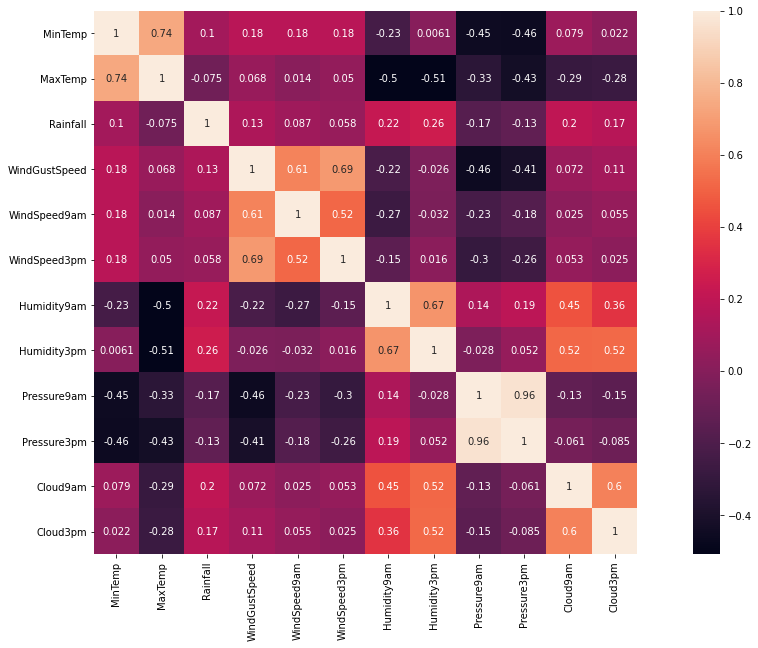

In [0]:

pandas_df=df.toPandas()
plt.pyplot.subplots(figsize=(20,10))
sns.heatmap(pandas_df[a[0:-2]].corr(),annot=True,square=True)
plt.pyplot.show()

In [0]:
pandas_df.columns
pandas_df=pandas_df[pandas_df['RainToday']!='RainToday']
pandas_df=pandas_df.dropna(subset=['RainToday'])

Out[19]:

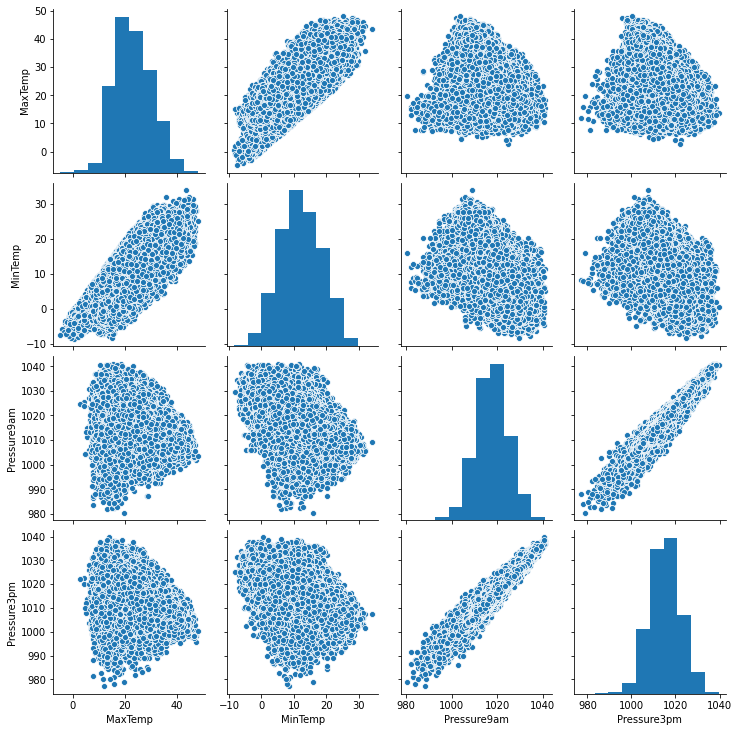

<seaborn.axisgrid.PairGrid at 0x7fe0015a1be0>

In [0]:
temp=pandas_df[['MaxTemp','MinTemp','Pressure9am','Pressure3pm']]
sns.pairplot(temp[:])

In [0]:
df_corr=pd.DataFrame(pandas_df.corr(method='pearson'))
df_corr

Out[20]:

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
WindGustSpeed,0.177415,0.067615,0.133659,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841
Pressure9am,-0.450970,-0.332061,-0.168154,-0.458744,-0.228743,-0.296351,0.139442,-0.027544,1.000000,0.961326,-0.129796,-0.147861,-0.422556,-0.286770
Pressure3pm,-0.461292,-0.427167,-0.126534,-0.413749,-0.175817,-0.255439,0.186858,0.051997,0.961326,1.000000,-0.060772,-0.084778,-0.470187,-0.389548


In [0]:
# Create correlation matrix
corr_matrix = pandas_df.corr().abs()


In [0]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [0]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.50)]

In [0]:
display(df.filter((df['location']!='Location')).groupBy('location',month('Date')).agg(avg('rainfall')))

location,month(Date),avg(rainfall)
NorahHead,7,2.9544715307713525
Richmond,10,0.9246963514128195
SydneyAirport,5,2.363440849340945
Wollongong,2,4.090497765201249
Sydney,10,2.1640287844611588
Cobar,12,1.2193548367594793
NorfolkIsland,4,2.7100000134358804
Wollongong,11,4.034453770505781
Cobar,10,0.7911290380382731
Newcastle,3,4.06926070043549


In [0]:
%sql select * from (select location,rainfall,Dense_Rank()Over(Partition BY rainfall order by location desc ) as Rank from australia where location != 'Location') where location = 'Cairns' order by rainfall desc

location,rainfall,Rank
Cairns,278.4,1
Cairns,268.6,1
Cairns,247.2,1
Cairns,206.2,1
Cairns,183.0,1
Cairns,175.2,1
Cairns,161.6,1
Cairns,158.0,1
Cairns,150.2,1
Cairns,140.2,1


In [0]:
%sql select * from (select location,avg,Dense_Rank()Over(order by avg desc)as Rank from (select location,avg(rainfall) as avg from australia where location !='Location' group by location)) where Rank<=20;

location,avg,Rank
Cairns,5.7420348100553715,1
Darwin,5.092452237314279,2
CoffsHarbour,5.061496793439115,3
GoldCoast,3.769395964962724,4
Wollongong,3.594902753685042,5
Williamtown,3.591108513436409,6
Townsville,3.485591823885514,7
NorahHead,3.3872994252920314,8
Sydney,3.3245430075286353,9
MountGinini,3.292260062091737,10


In [0]:
%sql select * from (select location,max,Dense_Rank()Over(order by max desc)as Rank,Date from (select location,max(rainfall) as max,Date from australia where location !='Location' group by location,Date)) where Rank<=20 order by Date asc;

location,max,Rank,Date
Cairns,278.4,3,2009-01-12
Townsville,236.8,7,2009-02-03
CoffsHarbour,189.0,16,2009-02-17
CoffsHarbour,371.0,1,2009-11-07
Townsville,206.8,13,2009-12-31
Cairns,268.6,4,2011-02-04
Darwin,367.6,2,2011-02-16
Darwin,184.6,17,2011-02-17
Cairns,183.0,19,2011-02-25
Cairns,206.2,14,2011-10-19


In [0]:
df.filter((df['Sunshine']!='NA')).groupBy('location',month('Date').alias('Month')).agg(avg('Sunshine').alias('Avg_Sunshine(in Hour)')).orderBy(month('Date')).display()

location,Month,Avg_Sunshine(in Hour)
MountGambier,1,9.655918367346946
Townsville,1,7.679435483870968
NorfolkIsland,1,8.054655870445341
Dartmoor,1,9.655918367346946
Adelaide,1,11.17848837209302
Moree,1,9.868749999999999
PearceRAAF,1,11.283812949640271
Sale,1,8.939459459459462
Albany,1,8.521491228070174
AliceSprings,1,9.996521739130436


In [0]:
%sql
--Find the average MaxTemp and Mintemp when the rainToday was "Yes" 
--This might tell us the temperature range.
--Also after this bring the other factors like clouds and pressure and wind.
select location, RainToday,avg(MaxTemp) as Avg_MaxTemp from australia where RainToday != 'NA' group by location,RainToday order by location

location,RainToday,Avg_MaxTemp
Adelaide,Yes,17.735994182581134
Adelaide,No,24.43506871040341
Albany,No,21.12289968042836
Albany,Yes,17.54631935456601
Albury,Yes,18.67601297585659
Albury,No,23.662866725505946
AliceSprings,Yes,26.368442699557445
AliceSprings,No,29.49637471628292
BadgerysCreek,Yes,22.580550776496402
BadgerysCreek,No,24.373942750379197


In [0]:
df.show()

+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
 Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
2008-12-01| Albury| 13.4| 22.9| 0.6| NA| NA| W| 44.0| W| WNW| 20.0| 24.0| 71.0| 22.0| 1007.7| 1007.1| 8.0| null| 16.9| 21.8| No| No|
2008-12-02| Albury| 7.4| 25.1| 0.0| NA| NA| WNW| 44.0| NNW| WSW| 4.0| 22.0| 44.0| 25.0| 1010.6| 1007.8| null| null| 17.2| 24.3| No| No|
2008-12-03| Albury| 12.9| 25.7| 0.0| NA| NA| WSW| 46.0| W| WSW| 19.0| 26.0| 38.0| 30.0| 1007.6| 1008.7| null| 2.0| 21.0| 23.2| No| No|
2008-12-04| Albury| 9.2| 28.0| 0.0| NA| NA| NE| 24.0| SE| E| 11.0| 9.0| 45.0| 16.0| 1017.6| 1012.8| null| null| 18.1| 26.5| No| No|
2008-12-05| Albury| 17.5| 32.3| 1.0| NA| NA| W| 41.0| ENE| NW| 7.0| 20.0| 82.0| 33.0| 1010.8| 1006.0| 7.0| 8.0| 17.8| 29.7| No| No|
2008-12-06| Albury| 14.6| 29.7| 0.2| NA| NA| WNW| 56.0| W| W| 19.0| 24.0| 55.0| 23.0| 1009.2| 1005.4| null| null| 20.6| 28.9| No| No|
2008-12-07| Albury| 14.3| 25.0| 0.0| NA| NA| W| 50.0| SW| W| 20.0| 24.0| 49.0| 19.0| 1009.6| 1008.2| 1.0| null| 18.1| 24.6| No| No|
2008-12-08| Albury| 7.7| 26.7| 0.0| NA| NA| W| 35.0| SSE| W| 6.0| 17.0| 48.0| 19.0| 1013.4| 1010.1| null| null| 16.3| 25.5| No| No|
2008-12-09| Albury| 9.7| 31.9| 0.0| NA| NA| NNW| 80.0| SE| NW| 7.0| 28.0| 42.0| 9.0| 1008.9| 1003.6| null| null| 18.3| 30.2| No| Yes|
2008-12-10| Albury| 13.1| 30.1| 1.4| NA| NA| W| 28.0| S| SSE| 15.0| 11.0| 58.0| 27.0| 1007.0| 1005.7| null| null| 20.1| 28.2| Yes| No|
2008-12-11| Albury| 13.4| 30.4| 0.0| NA| NA| N| 30.0| SSE| ESE| 17.0| 6.0| 48.0| 22.0| 1011.8| 1008.7| null| null| 20.4| 28.8| No| Yes|
2008-12-12| Albury| 15.9| 21.7| 2.2| NA| NA| NNE| 31.0| NE| ENE| 15.0| 13.0| 89.0| 91.0| 1010.5| 1004.2| 8.0| 8.0| 15.9| 17.0| Yes| Yes|
2008-12-13| Albury| 15.9| 18.6| 15.6| NA| NA| W| 61.0| NNW| NNW| 28.0| 28.0| 76.0| 93.0| 994.3| 993.0| 8.0| 8.0| 17.4| 15.8| Yes| Yes|
2008-12-14| Albury| 12.6| 21.0| 3.6| NA| NA| SW| 44.0| W| SSW| 24.0| 20.0| 65.0| 43.0| 1001.2| 1001.8| null| 7.0| 15.8| 19.8| Yes| No|
2008-12-15| Albury| 8.4| 24.6| 0.0| NA| NA| NA| null| S| WNW| 4.0| 30.0| 57.0| 32.0| 1009.7| 1008.7| null| null| 15.9| 23.5| No| NA|
2008-12-16| Albury| 9.8| 27.7| null| NA| NA| WNW| 50.0| NA| WNW| null| 22.0| 50.0| 28.0| 1013.4| 1010.3| 0.0| null| 17.3| 26.2| NA| No|
2008-12-17| Albury| 14.1| 20.9| 0.0| NA| NA| ENE| 22.0| SSW| E| 11.0| 9.0| 69.0| 82.0| 1012.2| 1010.4| 8.0| 1.0| 17.2| 18.1| No| Yes|
2008-12-18| Albury| 13.5| 22.9| 16.8| NA| NA| W| 63.0| N| WNW| 6.0| 20.0| 80.0| 65.0| 1005.8| 1002.2| 8.0| 1.0| 18.0| 21.5| Yes| Yes|
2008-12-19| Albury| 11.2| 22.5| 10.6| NA| NA| SSE| 43.0| WSW| SW| 24.0| 17.0| 47.0| 32.0| 1009.4| 1009.7| null| 2.0| 15.5| 21.0| Yes| No|
2008-12-20| Albury| 9.8| 25.6| 0.0| NA| NA| SSE| 26.0| SE| NNW| 17.0| 6.0| 45.0| 26.0| 1019.2| 1017.1| null| null| 15.8| 23.2| No| No|
+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
only showing top 20 rows

Out[27]:

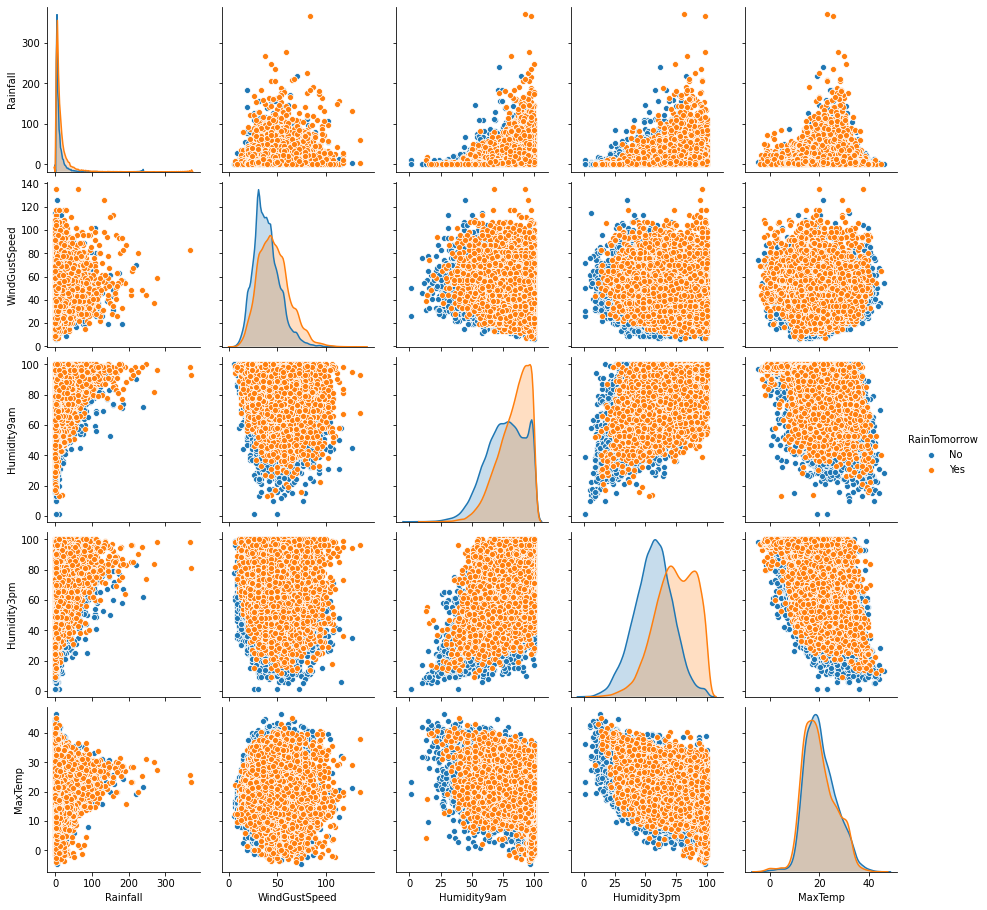

<seaborn.axisgrid.PairGrid at 0x7fe0025e7af0>

In [0]:
#Find the correaltion between pressure and rainfall
low_pressurerain=pandas_df[(pandas_df['RainTomorrow']!='NA') & (pandas_df['Rainfall']>0)]
sns.pairplot(low_pressurerain[['Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','MaxTemp','RainTomorrow']],hue='RainTomorrow')

In [0]:
%sql
--Find the relationship between WindGhustDir, WindGhustSpeed and maxtemp
select location,WindGustDir,avg(WindGustSpeed),avg(MaxTemp) from australia where WindGustDir != 'NA' group by location,WindGustDir order by location,WindGustDir


location,WindGustDir,avg(WindGustSpeed),avg(MaxTemp)
Adelaide,E,35.98823529411764,24.694117534861846
Adelaide,ENE,29.743243243243242,22.08243243758743
Adelaide,ESE,37.32214765100671,27.426174535047288
Adelaide,N,34.751724137931035,22.599310355350887
Adelaide,NE,35.60919540229885,23.38850573835702
Adelaide,NNE,34.45192307692308,22.7576922086569
Adelaide,NNW,39.312849162011176,23.61396651028255
Adelaide,NW,40.899441340782126,23.701117318435752
Adelaide,S,36.111111111111114,22.284127053760347
Adelaide,SE,37.119170984455955,25.279792775761894
